In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.min_rows = 115

In [ ]:
# read the file into a dataframe
df = pd.read_csv('airbnbNYC_dataset.csv')

C:\Users\sagar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (27,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#To find the missing values in dataset 
pd.DataFrame(df.isna().sum())

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
name,51
summary,7281
space,42888
description,3567
experiences_offered,0
neighborhood_overview,52796


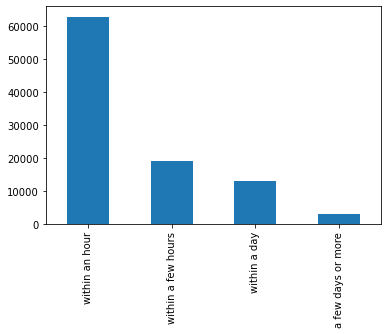

In [ ]:
#Data Cleanup - Replacing missing value with most occuring  
df['host_response_time'].isna().sum()
df['host_response_time'].value_counts().plot(kind='bar')
df['host_response_time'] = df['host_response_time'].fillna('within an hour')

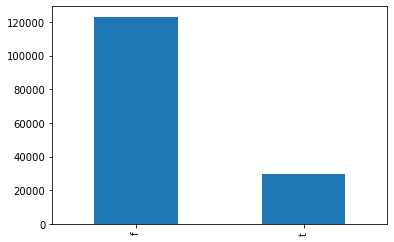

In [ ]:
#Data Cleanup - Replacing missing value with most occuring 
df['host_is_superhost'].isna().sum()
df['host_is_superhost'].value_counts().plot(kind='bar')
df['host_is_superhost'] = df['host_is_superhost'].fillna('f')

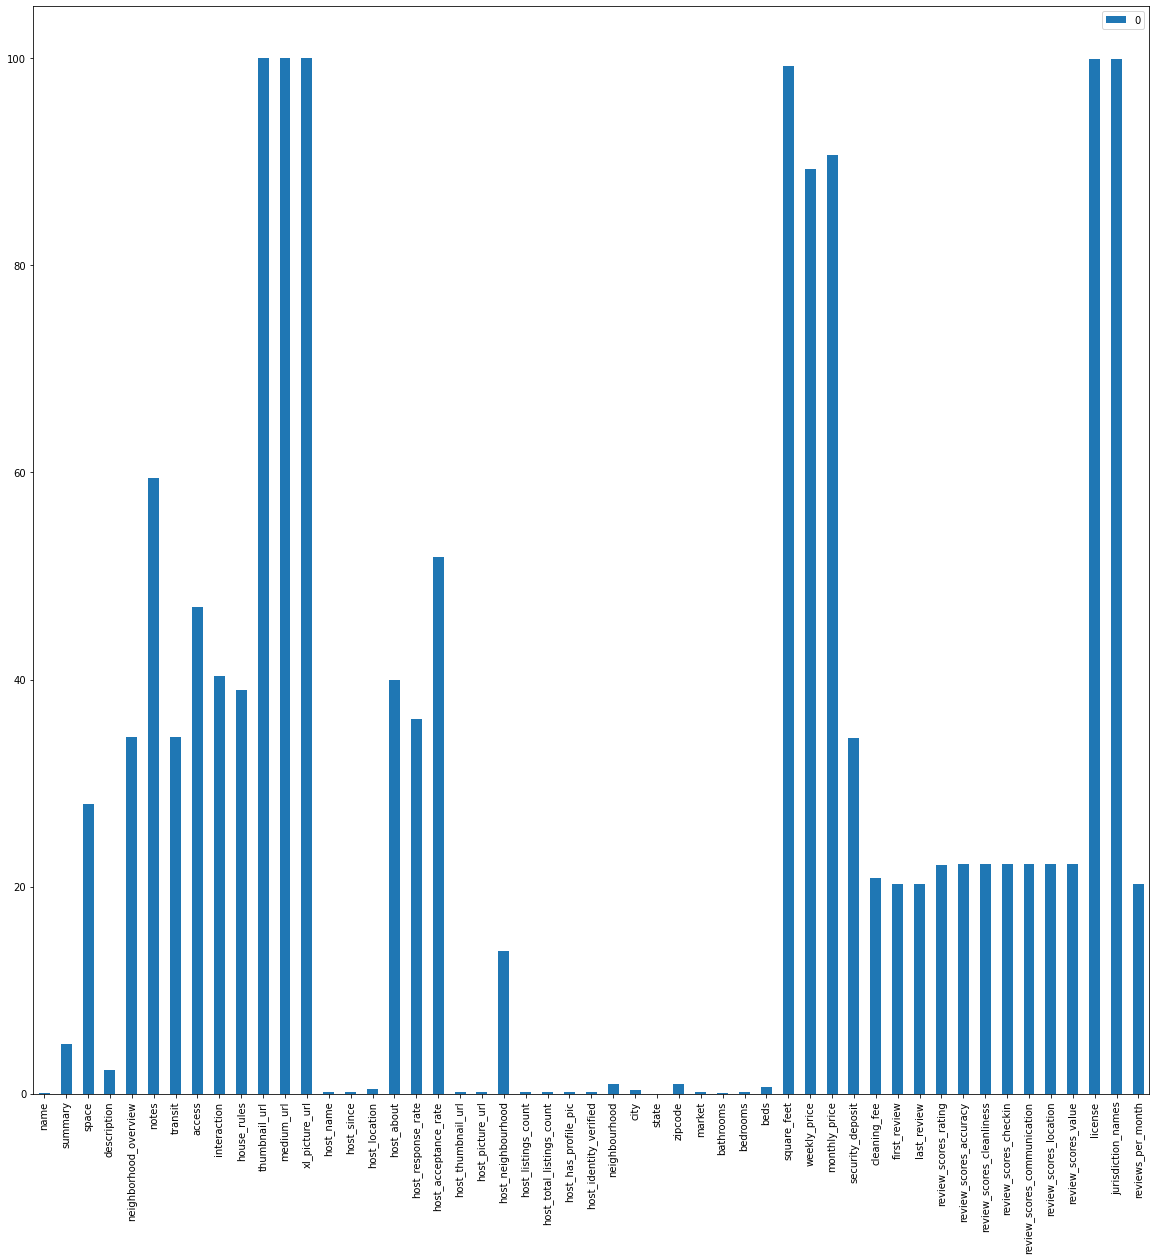

In [ ]:
#Replace ' ' or (Blanks) with NaN 
df = df.replace({'':np.nan})
def CalMissing(df):
    MissingDF = 100*df.isna().sum()/len(df.index)
    MissingDF = MissingDF.to_frame()
    MissingDF = MissingDF[MissingDF[0] != 0]
    MissingDF.plot.bar(figsize=(20,20))
    return MissingDF
X = CalMissing(df)

In [ ]:
#Data cleanup - Removing special characters from dataset 
df['host_response_rate']=df['host_response_rate'].str.replace('[%]','')
df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('[%]','')
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']] = df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[$,,]', '', regex=True)
df['host_response_rate'].apply(lambda x: float(x))
df['host_acceptance_rate'].apply(lambda x: float(x))
df['price'].apply(lambda x: float(x))

C:\Users\sagar\AppData\Local\Temp/ipykernel_21228/3305291633.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_response_rate']=df['host_response_rate'].str.replace('[%]','')
C:\Users\sagar\AppData\Local\Temp/ipykernel_21228/3305291633.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('[%]','')


0          225.0
1           89.0
2          200.0
3           60.0
4           79.0
5           79.0
6          150.0
7           99.0
8           89.0
9           85.0
10         120.0
11         140.0
12         199.0
13         140.0
14          99.0
15         190.0
16         299.0
17         115.0
18          32.0
19         120.0
20          80.0
21          44.0
22         175.0
23          50.0
24          52.0
25          50.0
26          70.0
27          89.0
28          85.0
29         150.0
           ...  
153224      58.0
153225      80.0
153226     144.0
153227      99.0
153228     324.0
153229      79.0
153230     115.0
153231      95.0
153232     100.0
153233       0.0
153234      43.0
153235      35.0
153236      33.0
153237      50.0
153238      41.0
153239     175.0
153240      38.0
153241     300.0
153242      32.0
153243     139.0
153244     115.0
153245     139.0
153246    4000.0
153247     145.0
153248      50.0
153249     150.0
153250     149.0
153251     188

In [ ]:
#Convert String columns to Numeric
df[['host_response_rate', 'host_acceptance_rate','price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']] = df[['host_response_rate', 'host_acceptance_rate','price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].apply(pd.to_numeric)
#Replacing the missing values of numerical column with mean 
df_numeric = df.select_dtypes(include=np.number)
for col in df_numeric.columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
# Remove Price outliers
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
df = df[df['price'] < upper_limit]
df.shape

(144027, 106)

In [ ]:
#Drop rows and columns that has missing values and redundant in any of the subset columns
mod_df = df.dropna( how='any',
                    subset=['host_is_superhost', 'host_listings_count','neighbourhood','beds','host_location','reviews_per_month'])
# Drop columns that has only URL
mod_df=mod_df.loc[:, ~mod_df.columns.str.contains("url")]
#Drop columns that has more than 55% missing values 
mod_df = mod_df.drop(mod_df.loc[:,list((100*(mod_df.isnull().sum()/len(mod_df))>=55))].columns, 1)
#Drop redundant columns
mod_df=mod_df.drop(['name','host_name','neighbourhood','calendar_updated','host_neighbourhood', 'city','zipcode','market','first_review','last_review','calendar_last_scraped','experiences_offered','last_scraped','scrape_id','id'], axis = 1)

C:\Users\sagar\AppData\Local\Temp/ipykernel_21228/3069493385.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mod_df = mod_df.drop(mod_df.loc[:,list((100*(mod_df.isnull().sum()/len(mod_df))>=55))].columns, 1)


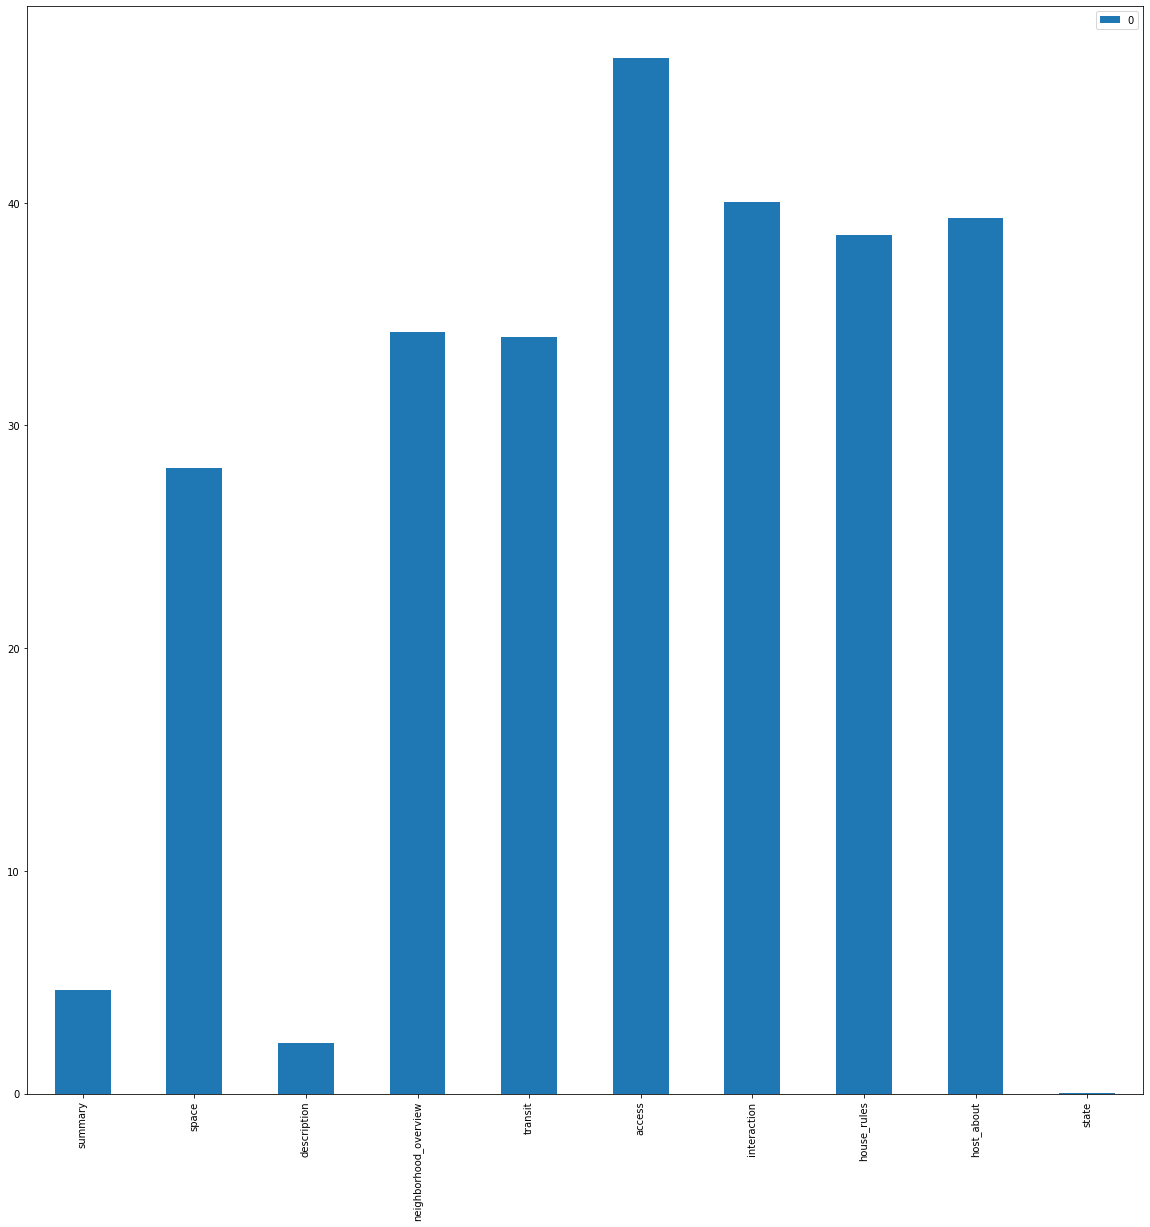

In [ ]:
#use following function to check missing value %
X = CalMissing(mod_df)

In [ ]:
#Mapping columns with True/False to 1/0
mod_df['host_is_superhost'] = mod_df['host_is_superhost'].map({'t':1 ,'f':0}) 
mod_df['host_has_profile_pic'] = mod_df['host_has_profile_pic'].map({'t':1 ,'f':0}) 
mod_df['host_identity_verified'] = mod_df['host_identity_verified'].map({'t':1 ,'f':0}) 
mod_df['is_location_exact'] = mod_df['is_location_exact'].map({'t':1 ,'f':0})
mod_df['has_availability'] = mod_df['has_availability'].map({'t':1 ,'f':0}) 
mod_df['instant_bookable'] = mod_df['instant_bookable'].map({'t':1 ,'f':0}) 
mod_df['requires_license'] = mod_df['requires_license'].map({'t':1 ,'f':0}) 
mod_df['is_business_travel_ready'] = mod_df['is_business_travel_ready'].map({'t':1 ,'f':0}) 
mod_df['require_guest_profile_picture'] = mod_df['require_guest_profile_picture'].map({'t':1 ,'f':0})
mod_df['require_guest_phone_verification'] = mod_df['require_guest_phone_verification'].map({'t':1 ,'f':0}) 	

In [ ]:
# One hot encoding by creating dummy variables for categorical column)
categorical_cols = ['host_response_time', 'property_type','room_type', 'bed_type', 'cancellation_policy']  #Property_type increased 35 features

mod_df = pd.get_dummies(mod_df, columns = categorical_cols)

In [ ]:
mod_df.head().transpose()

,0,1,2,3,4
summary,"Beautiful, spacious skylit studio in the heart...",Urban retreat: enjoy 500 s.f. floor in 1899 br...,My large 1 bedroom apartment has a true New Yo...,NaN,Please don’t expect the luxury here just a bas...
space,"- Spacious (500+ft²), immaculate and nicely fu...",Greetings! We own a double-duplex brownst...,I have a large 1 bedroom apartment centrally l...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,"You will use one large, furnished, private roo..."
description,"Beautiful, spacious skylit studio in the heart...",Urban retreat: enjoy 500 s.f. floor in 1899 br...,My large 1 bedroom apartment has a true New Yo...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,Please don’t expect the luxury here just a bas...
neighborhood_overview,Centrally located in the heart of Manhattan ju...,Just the right mix of urban center and local n...,My neighborhood in Midtown East is called Murr...,NaN,"Theater district, many restaurants around here."
transit,Apartment is located on 37th Street between 5t...,B52 bus for a 10-minute ride to downtown Brook...,From the apartment is a 10 minute walk to Gran...,NaN,NaN
access,"Guests have full access to the kitchen, bathro...","You will have the private, exclusive use of an...",I will meet you upon arrival.,NaN,Bathroom is shared with the host but the kitch...
interaction,I am a Sound Therapy Practitioner and Kundalin...,"We'll be around, but since you have the top fl...",I usually check in with guests via text or ema...,NaN,NaN
house_rules,"Make yourself at home, respect the space and t...",Smoking - outside please; pets allowed but ple...,• Check-in time is 2PM. • Check-out time is 12...,NaN,"No smoking in the room. When you check out, pl..."
host_id,2845,4869,7322,7356,8967
host_since,2008-09-09,2008-12-07,2009-02-02,2009-02-03,2009-03-03


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

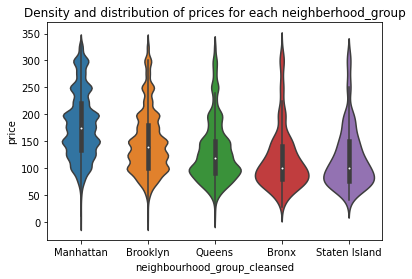

In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=mod_df[mod_df['room_type_Entire home/apt']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

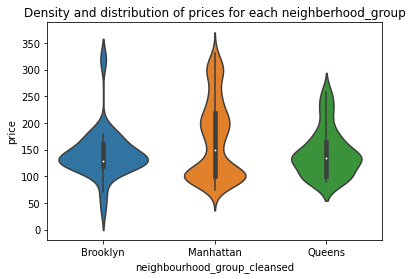

In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=mod_df[mod_df['room_type_Hotel room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

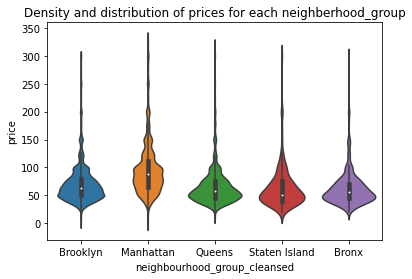

In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=mod_df[mod_df['room_type_Private room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

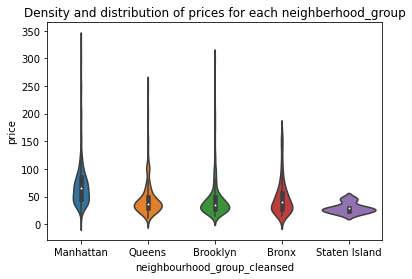

In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=mod_df[mod_df['room_type_Shared room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

-------------------PANDAS PROFILING------------------------

In [ ]:
pip install pandas_profiling 

In [ ]:
from pandas_profiling import ProfileReport
from ipywidgets import FloatProgress
from ipywidgets import IntProgress

In [ ]:
pip install ipywidgets --user

In [ ]:
report = ProfileReport(df,title='Airbnb Pricing',explorative=True)

In [ ]:
report

In [ ]:
report.to_file('Project_report.html')

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.columns)

In [ ]:
df.describe()

In [ ]:
#Scatterplot showing the relationship between Listing Price and Square Feet
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(mod_df["square_feet"],mod_df["price"])
plt.title('Price Vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

In [ ]:
#Probability distribution of Price 
from matplotlib.pyplot import figure
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(mod_df['price'], density=True, bins=500) 
plt.xlim(0,11000)
plt.ylabel('Probability')
plt.xlabel('Price');

In [ ]:
#Listing details summary by State
import warnings
warnings.filterwarnings("ignore")
df_state= mod_df[['state','review_scores_location','price','square_feet','beds']]
df_state['state']=df_state['state'].replace(['ny'],'NY')
df_state['state']=df_state['state'].replace(['Ny'],'NY')
df_state['state']=df_state['state'].replace(['New York'],'NY')
dfstate=df_state.groupby(['state'])
dfstate.describe()